In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# **Linear program to optimize the selection and purchase of top rated wines. The goal of this notebook is to develop and apply a linear program to optimize the selection (purchase) of top rated wine within a budget.**

In [132]:
#create a dataframe from the wine csv
wine = pd.DataFrame.from_csv('winemag-data-130k-v2.csv')
wine.shape

(129971, 13)

In [133]:
wine.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [134]:
# reduce the data set for the fields relevant to the linear program
wine_reduced = wine.filter(['variety','winery','title', 'country','province','region_1','region_2','points','price' ], axis=1)
wine_reduced.head()

,variety,winery,title,country,province,region_1,region_2,points,price
0,White Blend,Nicosia,Nicosia 2013 Vulkà Bianco (Etna),Italy,Sicily & Sardinia,Etna,NaN,87,NaN
1,Portuguese Red,Quinta dos Avidagos,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,Douro,NaN,NaN,87,15
2,Pinot Gris,Rainstorm,Rainstorm 2013 Pinot Gris (Willamette Valley),US,Oregon,Willamette Valley,Willamette Valley,87,14
3,Riesling,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,US,Michigan,Lake Michigan Shore,NaN,87,13
4,Pinot Noir,Sweet Cheeks,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,US,Oregon,Willamette Valley,Willamette Valley,87,65


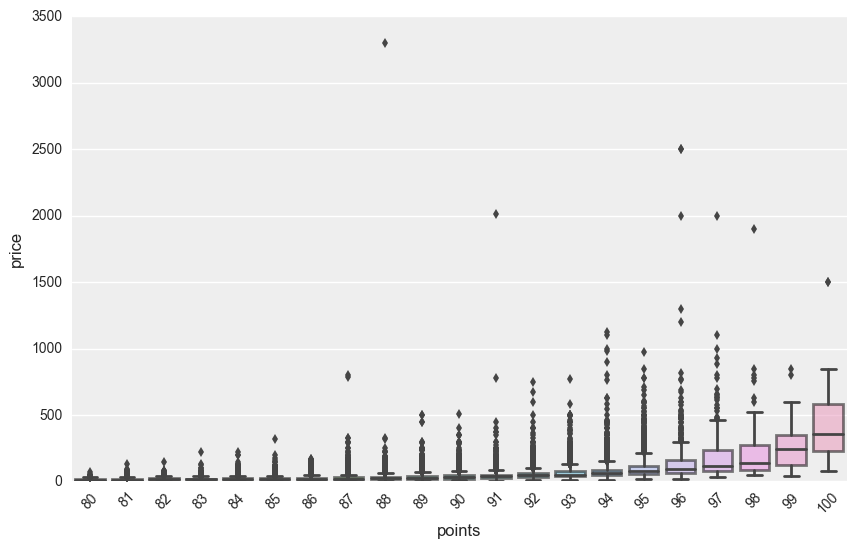

In [135]:
#lets see the distribution of points to price

plt.figure(figsize = (10, 6))
box = sns.boxplot(x='points', y='price', data=wine_reduced)
plt.setp(box.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
box

#Based on the boxplot, there does seem to be an overall trend that higher rated wines also cost more.

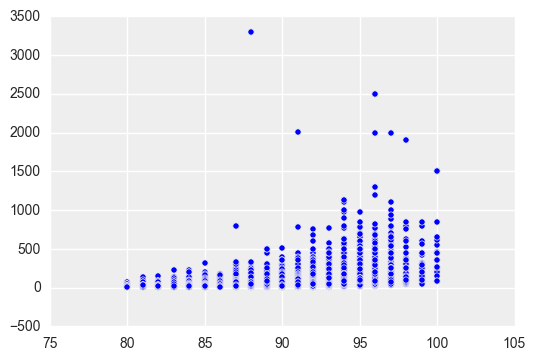

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


In [136]:
#scatterplot will also help us understand the relationship between points and price

x = wine_reduced['points']
y = wine_reduced['price']
plt.scatter(x, y)
plt.show()


wine_reduced.corr()

Scattter plot shows a weak relationship between the two. Correlation below provides evidence of a weak linear relationship
of price and points. At face value, the above visualizations show that a simple linear regression model to predict price of a bottle of wine based on the points will provide minimal value. 

Of course, you can always transform the data, but that got me thinking about what other methods can generate value.
One idea, use Linear Programming to build an optimization model to maximize ratings of purchased wine, BUT within a budget
Buying the best wine is always the goal, but there is always a budget constraint. 

In [137]:
#Lets cleanup the dataset. Because we need price and points. We will have to drop missing values before we do that, lets determine if there are duplicate rows
wine_reduced['dupes'] = wine_reduced.duplicated()

In [138]:
pd.value_counts(wine_reduced['dupes'].values, sort=False)

False    119887
True      10084
dtype: int64

In [139]:
#Result of the dupes
wine_reduced.loc[wine_reduced['dupes'] == True]

,variety,winery,title,country,province,region_1,region_2,points,price,dupes
1176,Prosecco,Spagnol,Spagnol NV Col del Sas Extra Dry (Prosecco di...,Italy,Veneto,Prosecco di Valdobbiadene,NaN,86,18,True
2408,Chardonnay,Souverain,Souverain 2010 Chardonnay (North Coast),US,California,North Coast,North Coast,85,14,True
2409,Grillo,Tasca d'Almerita,Tasca d'Almerita 2011 Sallier de la Tour Grill...,Italy,Sicily & Sardinia,Sicilia,NaN,85,13,True
2410,Pinot Noir,Tres Palacios,Tres Palacios 2011 Reserve Pinot Noir (Maipo V...,Chile,Maipo Valley,NaN,NaN,85,13,True
2412,Monica,Cantine di Dolianova,Cantine di Dolianova 2010 Dolia (Monica di Sa...,Italy,Sicily & Sardinia,Monica di Sardegna,NaN,85,14,True
2413,Bordeaux-style White Blend,Château de Sours,Château de Sours 2011 La Fleur d'Amélie (Bord...,France,Bordeaux,Bordeaux Blanc,NaN,85,15,True
2414,Red Blend,Corvo,Corvo 2010 Rosso Red (Sicilia),Italy,Sicily & Sardinia,Sicilia,NaN,85,NaN,True
2694,Merlot,Undurraga,Undurraga 2001 Reserva Merlot (Maipo Valley),Chile,Maipo Valley,NaN,NaN,87,12,True
3431,Gamay,Yohan Lardy,Yohan Lardy 2015 Les Michelons (Moulin-à-Vent),France,Beaujolais,Moulin-à-Vent,NaN,88,25,True
3432,Gewürztraminer,Analemma,Analemma 2014 Atavus Vineyard Gewürztraminer (...,US,Washington,Columbia Gorge (WA),Washington Other,88,27,True


In [140]:
#remove any duplicates from variety, winery and title fields
wine_dedup = wine_reduced.drop_duplicates(['variety', 'winery', 'title'])

In [141]:
#lets see if we eliminated all the dupes. We should only see False in the array
wine_dedup.dupes.unique()

array([False], dtype=object)

In [142]:
#lets remove the NAs. 
wine_dedup.replace('', np.nan)
wine_clean = wine_dedup.dropna(subset=['points','price'], how = 'any')
wine_clean.head(20)

,variety,winery,title,country,province,region_1,region_2,points,price,dupes
1,Portuguese Red,Quinta dos Avidagos,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,Douro,NaN,NaN,87,15,False
2,Pinot Gris,Rainstorm,Rainstorm 2013 Pinot Gris (Willamette Valley),US,Oregon,Willamette Valley,Willamette Valley,87,14,False
3,Riesling,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,US,Michigan,Lake Michigan Shore,NaN,87,13,False
4,Pinot Noir,Sweet Cheeks,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,US,Oregon,Willamette Valley,Willamette Valley,87,65,False
5,Tempranillo-Merlot,Tandem,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Spain,Northern Spain,Navarra,NaN,87,15,False
6,Frappato,Terre di Giurfo,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Italy,Sicily & Sardinia,Vittoria,NaN,87,16,False
7,Gewürztraminer,Trimbach,Trimbach 2012 Gewurztraminer (Alsace),France,Alsace,Alsace,NaN,87,24,False
8,Gewürztraminer,Heinz Eifel,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Germany,Rheinhessen,NaN,NaN,87,12,False
9,Pinot Gris,Jean-Baptiste Adam,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,France,Alsace,Alsace,NaN,87,27,False
10,Cabernet Sauvignon,Kirkland Signature,Kirkland Signature 2011 Mountain Cuvée Caberne...,US,California,Napa Valley,Napa,87,19,False


In [143]:
#lets drop the dupes field
wine_clean = wine_clean.drop('dupes',1)
wine_clean[:5]


,variety,winery,title,country,province,region_1,region_2,points,price
1,Portuguese Red,Quinta dos Avidagos,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portugal,Douro,NaN,NaN,87,15
2,Pinot Gris,Rainstorm,Rainstorm 2013 Pinot Gris (Willamette Valley),US,Oregon,Willamette Valley,Willamette Valley,87,14
3,Riesling,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,US,Michigan,Lake Michigan Shore,NaN,87,13
4,Pinot Noir,Sweet Cheeks,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,US,Oregon,Willamette Valley,Willamette Valley,87,65
5,Tempranillo-Merlot,Tandem,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Spain,Northern Spain,Navarra,NaN,87,15


In [144]:
#test model on first 50 rows
model_test = wine_clean[:50].copy()
model_test['price'] = model_test.price.astype(int)

In [145]:
#What is the dimension of our final data frame
model_test.shape

(50, 9)

In [146]:
from scipy import optimize

In [147]:
# Note that since linprog only solves minimization problems, that sign of the cost function is inverted.
result = optimize.linprog(
    c = model_test['points']*-1, 
    A_ub=model_test['price'], 
    b_ub=[100],
    bounds=(0,1),
    method='simplex'
)
result.message

'Optimization terminated successfully.'

In [148]:
model_test['buy'] = result.x

In [149]:
print "Total Monies Spent :" + " " + str(model_test[model_test['buy']==1].price.sum())

Total Monies Spent : 88


In [150]:
model_test[model_test['buy']==1]

,variety,winery,title,country,province,region_1,region_2,points,price,buy
3,Riesling,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,US,Michigan,Lake Michigan Shore,NaN,87,13,1
8,Gewürztraminer,Heinz Eifel,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Germany,Rheinhessen,NaN,NaN,87,12,1
14,Chardonnay,Mirassou,Mirassou 2012 Chardonnay (Central Coast),US,California,Central Coast,Central Coast,87,12,1
27,Nero d'Avola,Stemmari,Stemmari 2013 Nero d'Avola (Terre Siciliane),Italy,Sicily & Sardinia,Terre Siciliane,NaN,87,10,1
38,Primitivo,Feudi di San Marzano,Feudi di San Marzano 2011 I Tratturi Primitivo...,Italy,Southern Italy,Puglia,NaN,86,11,1
39,Nero d'Avola,Feudo di Santa Tresa,Feudo di Santa Tresa 2011 Purato Made With Org...,Italy,Sicily & Sardinia,Sicilia,NaN,86,12,1
42,Gamay,Henry Fessy,Henry Fessy 2012 Nouveau (Beaujolais),France,Beaujolais,Beaujolais,NaN,86,9,1
44,Merlot,Sundance,Sundance 2011 Merlot (Maule Valley),Chile,Maule Valley,NaN,NaN,86,9,1


In [151]:
print "The number of bottles of wine purchased:" + " " + str(len(model_test[model_test['buy']==1].index))

The number of bottles of wine purchased: 8


**California Wine Mixer**. Now that we know the model works. Let's set up a scenario where we only want to purchase California Wine. We also want to limit the wine selection to the more popular wine varieties: Chardonnay, Cabernet Sauvignon, Pinot Gris/Grigio, Red Blend, Merlot, Pinot Noir and Rosé (see http://www.wineinstitute.org/resources/pressroom/05012017). We will also limit the dataset to wines 95pts and above to make the model really work. The objective will be the same, maximize the points/ratings of wines purchased, but stay within a budget. 

In [152]:
cali = wine_clean[wine_clean['province']=='California']
cali = cali[cali['points'] >= 95]

In [153]:
cali.head(10)

,variety,winery,title,country,province,region_1,region_2,points,price
352,Chardonnay,Rochioli,Rochioli 2014 South River Chardonnay (Russian ...,US,California,Russian River Valley,Sonoma,96,68
355,Chardonnay,Rochioli,Rochioli 2014 Sweetwater Chardonnay (Russian R...,US,California,Russian River Valley,Sonoma,96,68
362,Cabernet Sauvignon,J. Davies,J. Davies 2012 Jamie Cabernet Sauvignon (Diamo...,US,California,Diamond Mountain District,Napa,95,200
1557,Pinot Noir,Williams Selyem,Williams Selyem 2009 Precious Mountain Vineyar...,US,California,Sonoma Coast,Sonoma,99,94
1565,Cabernet Sauvignon,JCB,JCB 2009 No. 1 Cabernet Sauvignon (Napa Valley),US,California,Napa Valley,Napa,97,150
1567,Pinot Noir,Williams Selyem,Williams Selyem 2009 Allen Vineyard Pinot Noir...,US,California,Russian River Valley,Sonoma,97,82
1574,Cabernet Sauvignon,Groth,Groth 2008 Reserve Cabernet Sauvignon (Oakville),US,California,Oakville,Napa,96,125
1577,Pinot Noir,Williams Selyem,Williams Selyem 2009 Rochioli Riverblock Viney...,US,California,Russian River Valley,Sonoma,96,78
1579,Pinot Noir,Williams Selyem,Williams Selyem 2009 Flax Vineyard Pinot Noir ...,US,California,Russian River Valley,Sonoma,95,56
1584,Chardonnay,Hanzell,Hanzell 2009 Chardonnay (Sonoma Valley),US,California,Sonoma Valley,Sonoma,95,75


In [154]:
#select the wine varities
cali = cali.loc[(cali['variety']=='Chardonnay') | (cali['variety'] == "Cabernet Sauvignon") |(cali['variety'] == "Pinot Gris") |  
           (cali['variety'] == "Pinot Grigio") | (cali['variety'] == "Red Blend") | (cali['variety'] == "Red Blends") | 
           (cali['variety'] == "Merlot") | (cali['variety'] == "Pinot Noir") | (cali['variety'] == "Rosé") ]

In [155]:
cali.variety.unique()

array(['Chardonnay', 'Cabernet Sauvignon', 'Pinot Noir', 'Merlot',
       'Red Blend', 'Ros\xc3\xa9'], dtype=object)

Looks like we we lost Pinot Gris/Grigio when we flitered to California wines 95pts and above. 

In [156]:
cali.shape

(600, 9)

In [157]:
#lets set up our model and set a budget for 1000. This is going to be an awesome party!
result = optimize.linprog(
    c = cali['points']*-1, 
    A_ub=cali['price'], 
    b_ub=[1000],
    bounds=(0,1),
    method='simplex'
)
result.message

'Optimization terminated successfully.'

In [158]:
cali['buy'] = result.x

In [159]:
print "Total Monies Spent :" + " " + str(cali[cali['buy']==1].price.sum())

Total Monies Spent : 888.0


In [160]:
cali[cali['buy']==1]

,variety,winery,title,country,province,region_1,region_2,points,price,buy
26899,Chardonnay,Ryan Cochrane,Ryan Cochrane 2014 Solomon Hills Vineyard Char...,US,California,Santa Maria Valley,Central Coast,95,34,1
28643,Pinot Noir,Center of Effort,Center of Effort 2008 Pinot Noir (Edna Valley),US,California,Edna Valley,Central Coast,95,40,1
30119,Pinot Noir,Domaine Eden,Domaine Eden 2013 Pinot Noir (Santa Cruz Mount...,US,California,Santa Cruz Mountains,Central Coast,95,35,1
39060,Chardonnay,Dehlinger,Dehlinger 2013 Unfiltered Chardonnay (Russian ...,US,California,Russian River Valley,Sonoma,95,40,1
40316,Chardonnay,Testarossa,Testarossa 2010 Rincon Vineyard Chardonnay (Ar...,US,California,Arroyo Grande Valley,Central Coast,95,39,1
45804,Pinot Noir,Bjornstad,Bjornstad 2007 Hellenthal Vineyard Pinot Noir ...,US,California,Sonoma Coast,Sonoma,96,40,1
45805,Chardonnay,Boekenoogen,Boekenoogen 2007 Chardonnay (Santa Lucia Highl...,US,California,Santa Lucia Highlands,Central Coast,96,34,1
45806,Pinot Noir,Bjornstad,Bjornstad 2007 van der Kamp Vineyard Pinot Noi...,US,California,Sonoma Mountain,Sonoma,96,40,1
46000,Chardonnay,Ryan Cochrane,Ryan Cochrane 2015 Solomon Hills Vineyard Char...,US,California,Santa Maria Valley,Central Coast,96,36,1
47916,Chardonnay,Talley,Talley 2012 Oliver's Proprietor Grown Chardonn...,US,California,Edna Valley,Central Coast,95,36,1


In [161]:
print "The number of bottles of wine purchased:" + " " + str(len(cali[cali['buy']==1].index))

The number of bottles of wine purchased: 25
